https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
#installing all relevant lodules
!pip3 install numpy
!pip3 install pandas
!pip3 install scikit-learn
!pip install matplotlib

In [4]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [5]:
TRAIN_DATA_FILE_PATH = "/content/iris.csv"

In [6]:
#loading the dataset
iris_data = pd.read_csv(TRAIN_DATA_FILE_PATH, header=None)
iris_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width","label"]

In [7]:
#checking for null values if any
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
label           0
dtype: int64

In [9]:
#understanding the statiscal features of data
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
def euclidean_distance(x1, x2):
    """
      computes the euclidean distance between two points in n-dimensional space

      Parameters:
      x1: representing the coordinates of the first point
      x2: representing the coordinates of the second point

      returns: the euclidean distance between the two points
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

def normalize_features(min_vals, max_vals, data):
    """
        normalizes the features in the given data using min-max normalization
        if min_vals and max_vals are not provided, they are calculated from the data

        Parameters:
        min_vals: minimum values for normalization
        max_vals: maximum values for normalization
        data: contains the data to be normalized.

        returns:
        normalized_data: the normalized data
        min_vals: the minimum values used for normalization.
        max_vals: the maximum values used for normalization.
    """
    if min_vals is None or max_vals is None:
        min_vals = np.min(data, axis=0)
        max_vals = np.max(data, axis=0)
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data, min_vals, max_vals

def compute_distances(test_instances, train_instances):
    """
      computes the euclidean distances between each test instance and each train instance

      Parameters:
      test_instances: contains the test instances
      train_instances: contains the train instances

      returns: the distance matrix where distances[i, j] represents the
      euclidean distance between the ith test instance and the jth train instance
    """
    distances = np.zeros((len(test_instances), len(train_instances)))
    for i, x1 in enumerate(test_instances.values):
        for j, x2 in enumerate(train_instances.values):
            if i == j:
                continue
            else:
                distances[i, j] = euclidean_distance(x1, x2)
    return distances

def predict(neighbors, labels):
    """
      predicts the label for a given set of neighbors based on majority voting

      Parameters:
      neighbors: contains the indices of the neighbors
      labels: contains the labels corresponding to the neighbor

      returns: The predicted label based on majority voting among the neighbors
    """
    isetosa = 0
    ivirginica = 0
    iversicolor = 0
    for neighbor in neighbors:
        if labels.iloc[neighbor] == 'Iris-setosa':
            isetosa += 1
        elif labels.iloc[neighbor] == 'Iris-virginica':
            ivirginica += 1
        else:
            iversicolor += 1
    return find_highest_count_label(isetosa, ivirginica, iversicolor)

def get_predictions(distances, k, y_train):
    """
      generates predictions for each instance in the test set based on the distances
      to its k nearest neighbors in the training set

      Parameters:
      distances: contains the distances between test instances and train instances
      k: the number of nearest neighbors to consider
      y_train: contains the labels of the instances in the training set

      returns: the predicted labels for each instance in the test set
    """
    predictions = []
    for distance in distances:
        knn_indices = np.argsort(distance)[:k]
        prediction = predict(knn_indices, y_train)
        predictions.append(prediction)
    return predictions

def find_highest_count_label(isetosa, ivirginica, iversicolor):
    """
      finds the label with the highest count among the provided counts for
      different classes

      Parameters:
      isetosa: count of occurrences for'Iris-setosa'
      ivirginica: count of occurrences for 'Iris-virginica'
      iversicolor: count of occurrences for 'Iris-versicolor'

      returns: the label with the highest count among the provided counts
    """
    counts = {
        'Iris-setosa': isetosa,
        'Iris-virginica': ivirginica,
        'Iris-versicolor': iversicolor
    }
    return max(counts, key=counts.get)

def evaluate(predicted_labels, true_labels):
    """
      evaluates the accuracy of predicted labels compared to true labels

      Parameters:
      predicted_labels: contains the predicted labels
      true_labels: contains the true labels

      returns: the accuracy of the predicted labels compared to the true labels
    """
    if len(predicted_labels) != len(true_labels):
        raise ValueError("Error: len(predicted_labels) != len(true_labels)")
    correct_predictions = sum(1 for pred, true in zip(predicted_labels, true_labels) if pred == true)
    total_samples = len(true_labels)
    accuracy = correct_predictions / total_samples

    return accuracy

# Running KNN with Normalization

In [ ]:
#number of trials for each value of k
num_of_trials = 20

#values of k to be tested
k_values = list(range(1, 52, 2))

avg_train_acc = []
train_std_dv = []
avg_test_acc = []
test_std_dv = []

for k in k_values:
    train_accuracies = []
    test_accuracies = []
    for trial in range(0,num_of_trials):
        #shuffling the data to avoid any learning issues due to order of data
        shuffled_iris = shuffle(iris_data)
        X = shuffled_iris[[ 'sepal_length','sepal_width','petal_length','petal_width']]
        Y = shuffled_iris['label']
        x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.20)

        #normalizing the train features and thereafter test features
        x_train, min_vals, max_vals = normalize_features(None, None, data = x_train)
        x_test, min_vals, max_vals = normalize_features(min_vals, max_vals, data = x_test)

        #computing distances and getting predictions for training set to compute training accuracy
        train_distances = compute_distances(x_train, x_train)
        train_predictions = get_predictions(train_distances, k, y_train)
        train_accuracy = evaluate(train_predictions, y_train)
        train_accuracies.append(train_accuracy)

        #computing distances and getting predictions for testing set to compute testing accuracy
        test_distances = compute_distances(x_test, x_train)
        test_predictions = get_predictions(test_distances, k, y_train)
        test_accuracy = evaluate(test_predictions, y_test)
        test_accuracies.append(test_accuracy)

    #calculating mean and standard deviation of training and test accuracies
    avg_train_acc.append(np.mean(train_accuracies))
    train_std_dv.append(np.std(train_accuracies))
    avg_test_acc.append(np.mean(test_accuracies))
    test_std_dv.append(np.std(test_accuracies))

# Plotting Q1.1: Average accuracy of models trained over the training set

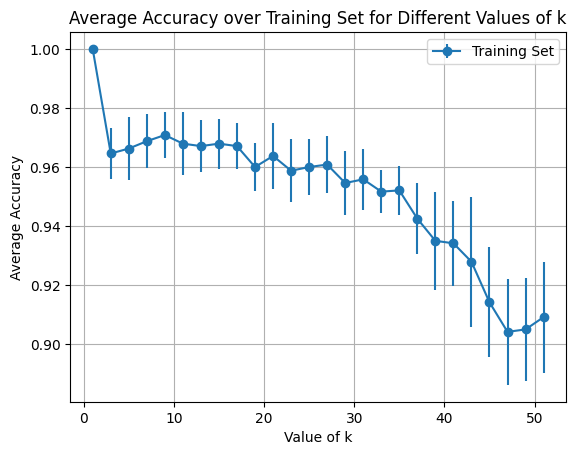

In [ ]:
plt.errorbar(k_values, avg_train_acc, yerr=train_std_dv, label='Training Set', fmt='-o')
plt.xlabel('Value of k')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy over Training Set for Different Values of k')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Q1.2: Average accuracy of models trained over the testing set


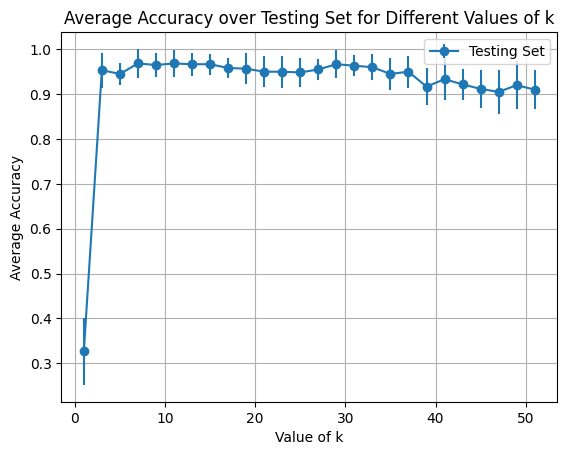

In [ ]:
plt.errorbar(k_values, avg_test_acc, yerr=test_std_dv, label='Testing Set', fmt='-o')
plt.xlabel('Value of k')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy over Testing Set for Different Values of k')
plt.legend()
plt.grid(True)
plt.show()

# Running KNN without Normalization

In [ ]:
#number of trials for each value of k
num_of_trials = 20

#values of k to be tested
k_values = list(range(1, 52, 2))

avg_train_acc = []
train_std_dv = []
avg_test_acc = []
test_std_dv = []

for k in k_values:
    train_accuracies = []
    test_accuracies = []
    for trial in range(0,num_of_trials):
        #shuffling the data to avoid any learning issues due to order of data
        shuffled_iris = shuffle(iris_data)
        X = shuffled_iris[[ 'sepal_length','sepal_width','petal_length','petal_width']]
        Y = shuffled_iris['label']
        x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.20)

        #computing distances and getting predictions for training set to compute training accuracy
        train_distances = compute_distances(x_train, x_train)
        train_predictions = get_predictions(train_distances, k, y_train)
        train_accuracy = evaluate(train_predictions, y_train)
        train_accuracies.append(train_accuracy)

        #computing distances and getting predictions for testing set to compute testing accuracy
        test_distances = compute_distances(x_test, x_train)
        test_predictions = get_predictions(test_distances, k, y_train)
        test_accuracy = evaluate(test_predictions, y_test)
        test_accuracies.append(test_accuracy)

    #calculating mean and standard deviation of training and test accuracies
    avg_train_acc.append(np.mean(train_accuracies))
    train_std_dv.append(np.std(train_accuracies))
    avg_test_acc.append(np.mean(test_accuracies))
    test_std_dv.append(np.std(test_accuracies))

# Plotting Q1.5: Average accuracy of models trained over the testing set without normalization

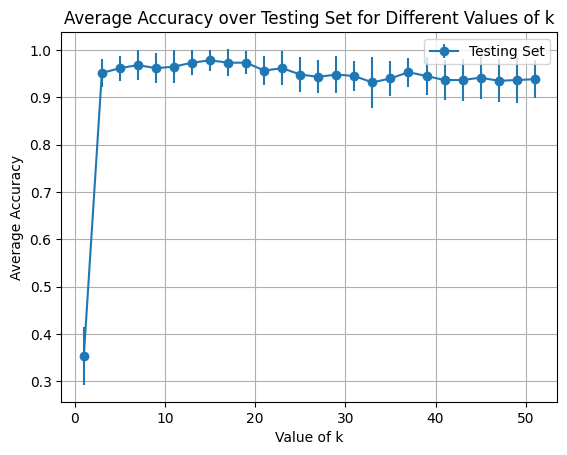

In [ ]:
plt.errorbar(k_values, avg_test_acc, yerr=test_std_dv, label='Testing Set', fmt='-o')
plt.xlabel('Value of k')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy over Testing Set for Different Values of k')
plt.legend()
plt.grid(True)
plt.show()